In [1]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [2]:
# LOADING GRID FILE AND VARIABLES
!pwd
grid_file = '../DATA/grille.nc' 
print 'file exist:', os.path.isfile(grid_file)

f = Dataset(grid_file) # open netcdf
# extracting variables
lon_t = f.variables['longitude_t'][:] # extracting lon data
lat_t = f.variables['latitude_t'][:] # extracting lat data
depth_t = f.variables['depth_t'][:]
bathy = f.variables['h_w'][:]
print 'Bathy :', np.shape(bathy), 'max :', np.max(bathy), 'min :', np.min(bathy)

f.close()

new_bath = np.ma.masked_where(bathy<200, bathy)

/home/dosa/MON_ENV_PYTHON/IAV
file exist: True
Bathy : (160, 394) max : 5054.49 min : 20.5226


In [3]:
file_path = "./ANNUEL_BIOMETEOPHY/"
list_ann_files = []

for temp_file in os.listdir(file_path):
    if (fnmatch.fnmatch(temp_file, '19*.nc')) | (fnmatch.fnmatch(temp_file, '20*.nc')):
        list_ann_files.append(temp_file)
        
#list_ann_files

In [4]:
var_list = ['ppb', 'netppb', 'resp', 'ncp', 'export_doc200', 'export_poc200']

for var in var_list:
    vars()[var+'_arr'] = np.zeros([160,394,33])
    vars()[var+'_arr'][:] = np.nan

z = 0

for curr_file in list_ann_files:
    f = Dataset(file_path+curr_file)
    
    for var in var_list:
        temp_var = f.variables[var][0,:,:]

        vars()[var+'_arr'][:,:,z] = temp_var
        temp_var = []
    
    z += 1
    
    f.close()

END of CELL


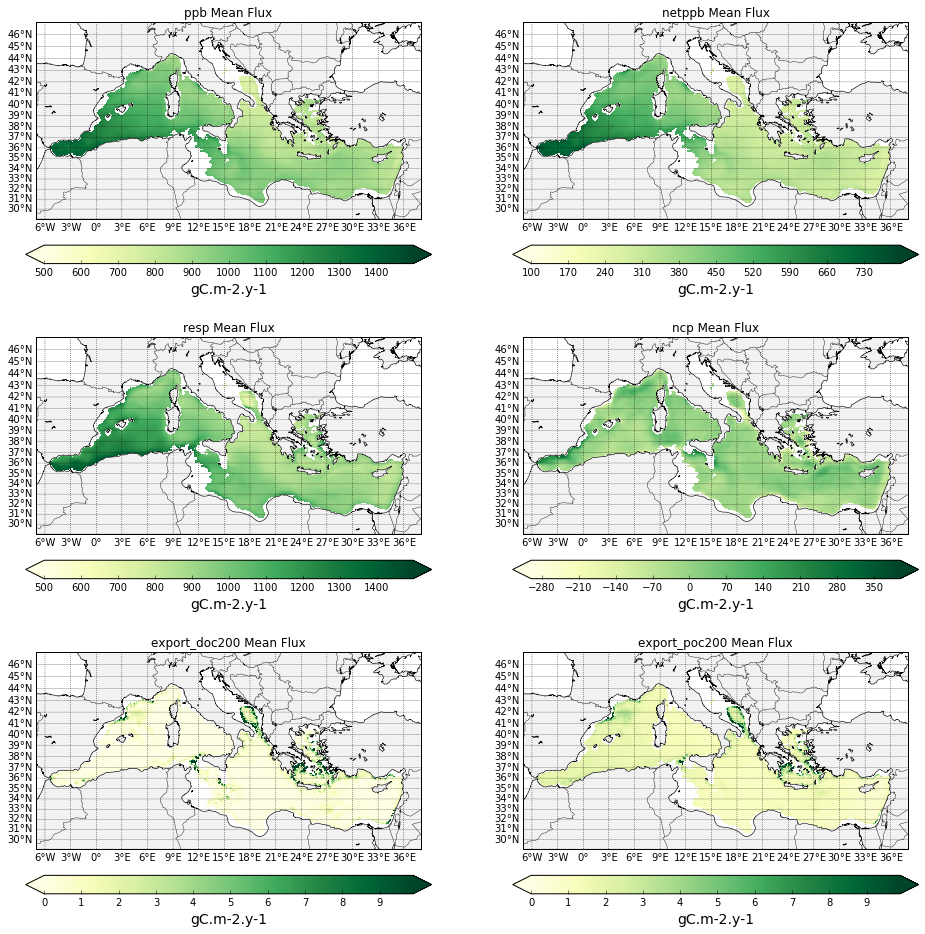

In [52]:
var_list = ['ppb', 'netppb', 'resp', 'ncp', 'export_doc200', 'export_poc200']
plt.figure(figsize=(16,16))
c = 1

for var in var_list:
    vars()[var+'_mean'] = np.nanmean(vars()[var+'_arr'], axis=(2))
    
    # figure
    plt.subplot(3, 2, c)
 
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);   
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    meridians = np.arange(-6.,351.,3);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()[var+'_mean'])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    if var == 'ppb':
        levels = np.arange(500,1500,1);
        txt_lab = 'gC.m-2.y-1'
    elif var == 'netppb':
        levels = np.arange(100,800,1);
        txt_lab = 'gC.m-2.y-1'
    elif var == 'resp':
        levels = np.arange(500,1500,1);
        txt_lab = 'gC.m-2.y-1'
    elif var == 'ncp':
        levels = np.arange(-300,400,1);
        txt_lab = 'gC.m-2.y-1'
    elif var == 'export_doc200':
        levels = np.arange(0,10,0.1);
        txt_lab = 'gC.m-2.y-1'
    elif var == 'export_poc200':
        levels = np.arange(0,10,0.1);
        txt_lab = 'gC.m-2.y-1'
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.YlGn,extend='both');
    cb = plt.colorbar(cs, orientation='horizontal', pad = 0.1)
    cb.set_label(txt_lab, fontsize=14)
    plt.title(var+' Mean Flux')
    
    c += 1

plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/MEAN_IAV_MAPS/6var_mean_flux_YlGn.png',bbox_inches='tight',format='png') 
print 'END of CELL'

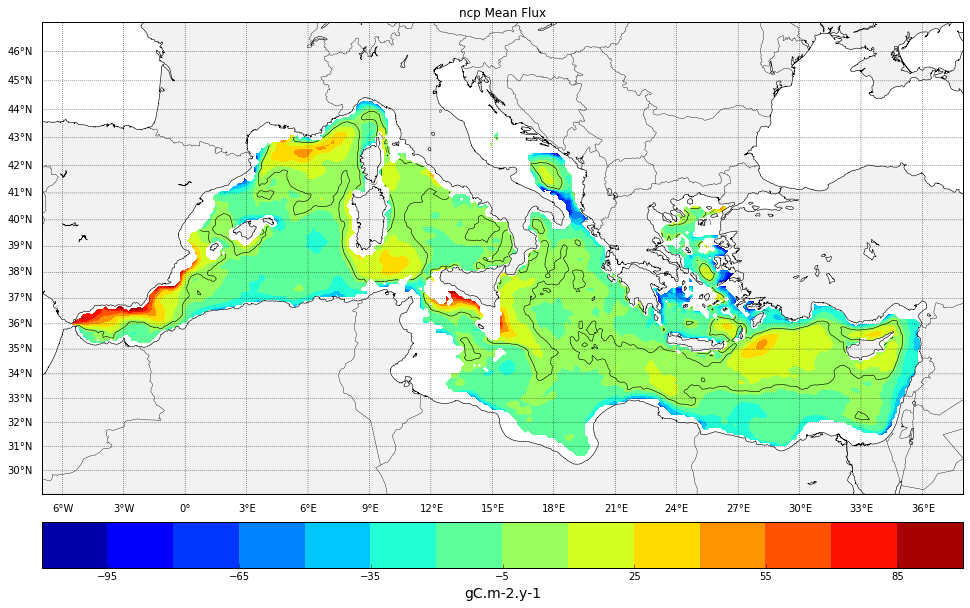

In [61]:
# 24/07 We need to first draw 1 map in order to get a 'fig' variable, and to be able to 
## use "ax = fig.add_axes([0.1,0.1,0.8,0.8]);" before doing subplots

var_list = ['ncp']
for var in var_list:
    vars()[var+'_mean'] = np.nanmean(vars()[var+'_arr'], axis=(2))
    vars()[var+'_mean'][:] = vars()[var+'_mean']*0.365 # from mgC.m-2.d-1 to gC.m-2.y-1
    
    # figure
    fig = plt.figure(figsize=(16,16))
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);   
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    meridians = np.arange(-6.,351.,3);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()[var+'_mean'])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    if var == 'ncp':
        #levels = np.arange(-1,2,0.2);
        #levels = np.arange(80,300,15);
        levels = np.arange(-110,111,15);
        txt_lab = 'gC.m-2.y-1'
        levels2 = [0];
        CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
        
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet); #,extend='both'  levels=levels,
    cb = plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    cb.set_label(txt_lab, fontsize=14)
    plt.title(var+' Mean Flux')

In [59]:
np.nanmin(data_to_plot)

-178.35830596923827

END of CELL


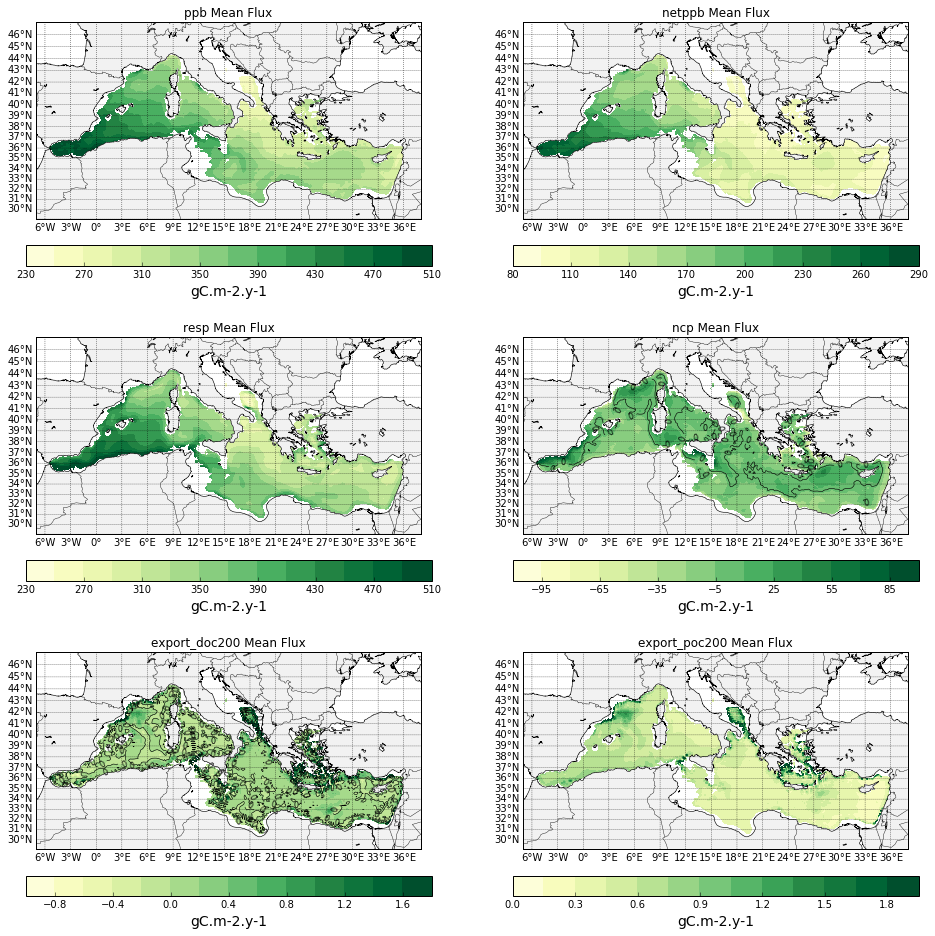

In [72]:
var_list = ['ppb', 'netppb', 'resp', 'ncp', 'export_doc200', 'export_poc200']
plt.figure(figsize=(16,16))
c = 1

for var in var_list:
    vars()[var+'_mean'] = np.nanmean(vars()[var+'_arr'], axis=(2))
    vars()[var+'_mean'][:] = vars()[var+'_mean']*0.365 # from mgC.m-2.d-1 to gC.m-2.y-1
    
    # figure
    plt.subplot(3, 2, c)
 
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);   
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    meridians = np.arange(-6.,351.,3);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()[var+'_mean'])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    if var == 'ppb':
        #levels = np.arange(150,550,25);
        levels = np.arange(230,530,20);
        #levels = np.arange(230,530,0.01);
        txt_lab = 'gC.m-2.y-1'
    elif var == 'netppb':
        levels = np.arange(80,300,15);
        #levels = np.arange(80,300,0.01);
        txt_lab = 'gC.m-2.y-1'
    elif var == 'resp':
        levels = np.arange(230,530,20);
        #levels = np.arange(230,530,0.01);
        txt_lab = 'gC.m-2.y-1'
    elif var == 'ncp':
        #levels = np.arange(-110,150,15);
        levels = np.arange(-110,111,15);
        #levels = np.arange(-110,111,0.01);
        txt_lab = 'gC.m-2.y-1'
        levels2 = [0];
        CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
        #test format contour
        # Define a class that forces representation of float to look a certain way
        # This remove trailing zero so '1.0' becomes '1'
        class nf(float):
            def __repr__(self):
                str = '%.1f' % (self.__float__(),)
                if str[-1] == '0':
                    return '%.0f' % self.__float__()
                else:
                    return '%.1f' % self.__float__()


        # Recast levels to new class
        CS1.levels = [nf(val) for val in CS1.levels]

        fmt = {}
        strs = ['0']
        for l, s in zip(CS1.levels, strs):
            fmt[l] = s
        plt.clabel(CS1, CS1.levels, inline=True, fmt=fmt, fontsize=8)
        #plt.clabel(CS1, inline=1, fontsize=10)
    elif var == 'export_doc200':
        levels = np.arange(-1,2,0.2);
        #levels = np.arange(-1,2,0.01);
        txt_lab = 'gC.m-2.y-1'
        levels2 = [0];
        CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
        #test format contour
        # Define a class that forces representation of float to look a certain way
        # This remove trailing zero so '1.0' becomes '1'
        class nf(float):
            def __repr__(self):
                str = '%.1f' % (self.__float__(),)
                if str[-1] == '0':
                    return '%.0f' % self.__float__()
                else:
                    return '%.1f' % self.__float__()


        # Recast levels to new class
        CS1.levels = [nf(val) for val in CS1.levels]

        fmt = {}
        strs = ['0']
        for l, s in zip(CS1.levels, strs):
            fmt[l] = s
        plt.clabel(CS1, CS1.levels, inline=True, fmt=fmt, fontsize=8)
        #plt.clabel(CS1, inline=1, fontsize=10)
    elif var == 'export_poc200':
        levels = np.arange(0,2,0.15);
        #levels = np.arange(0,2,0.01);
        txt_lab = 'gC.m-2.y-1'
        
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.YlGn); #,extend='both'
    cb = plt.colorbar(cs, orientation='horizontal', pad = 0.1)
    cb.set_label(txt_lab, fontsize=14)
    plt.title(var+' Mean Flux')
    
    c += 1

plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/MEAN_IAV_MAPS/6var_mean_flux_YlGn_convers.png',bbox_inches='tight',format='png') 
print 'END of CELL'

In [46]:
# Looking at high IAV zones: 1) loading data
IAV_1 = './IAV_BIO.nc'

print 'file exist:', os.path.isfile(IAV_1)

f = Dataset(IAV_1) # open netcdf
IAV_GPP = f.variables['stand_IAV_ppb'][0,:,:]# extracting data
IAV_NetPP = f.variables['stand_IAV_netppb'][0,:,:]# extracting data
IAV_NCP = f.variables['stand_IAV_ncp'][0,:,:]# extracting data
IAV_Resp = f.variables['stand_IAV_resp'][0,:,:]# extracting data
IAV_exp_doc200 = f.variables['stand_IAV_exp_doc200'][0,:,:]# extracting data
IAV_exp_poc200 = f.variables['stand_IAV_exp_poc200'][0,:,:]# extracting data

f.close()

file exist: True


IAV_GPP
IAV_NetPP
IAV_Resp
IAV_NCP
IAV_exp_doc200
IAV_exp_poc200
END of CELL


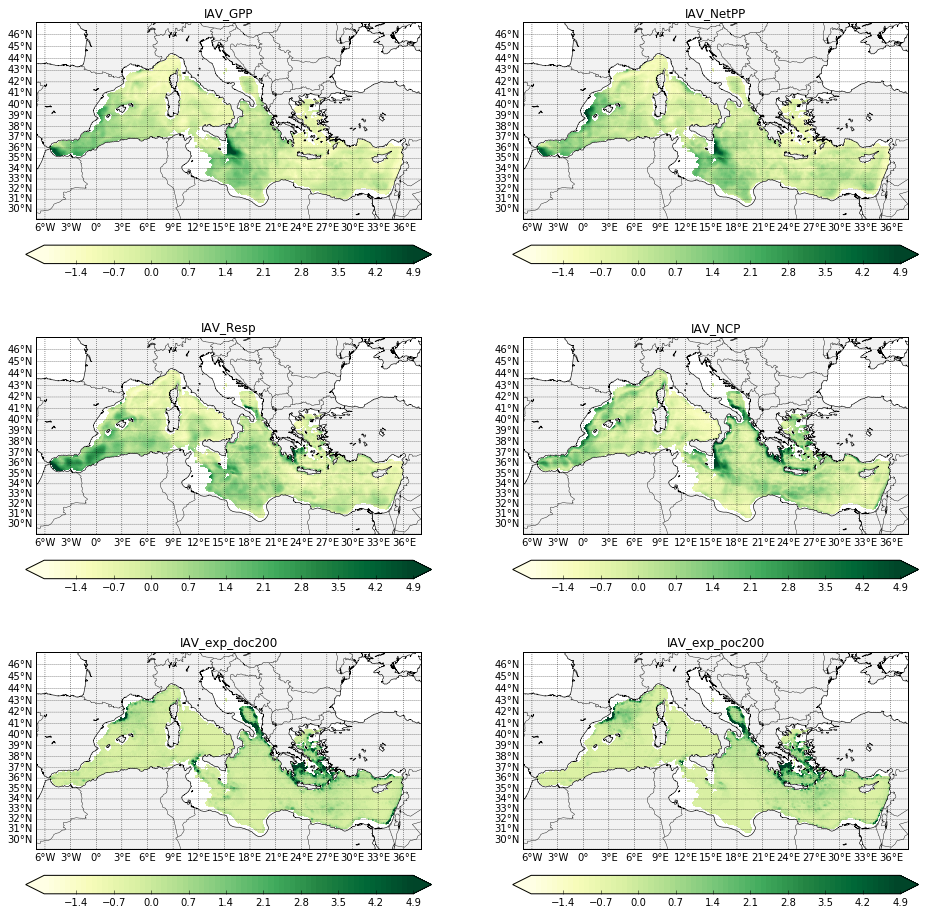

In [49]:
#IAV_Resp = IAV_GPP - IAV_NCP
var_list = ['GPP', 'NetPP', 'Resp', 'NCP', 'exp_doc200', 'exp_poc200']

plt.figure(figsize=(16,16))
c = 1

for var in var_list:    
    print 'IAV_'+var
    # figure
    plt.subplot(3, 2, c)
    
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,3);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()['IAV_'+var])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(-2,5,0.1);
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.YlGn,extend='both');# binary / RdYlGn_r
    plt.colorbar(cs, orientation='horizontal', pad = 0.1)
    plt.title('IAV_'+var)
    
    c += 1

plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/MEAN_IAV_MAPS/6var_IAV_YlGn.png',bbox_inches='tight',format='png') 

print 'END of CELL'